Import Packages

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import time
import matplotlib.pyplot as plt
from IPython.display import display
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
import tensorflow as tf
from sklearn import preprocessing
from keras.models import load_model
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


Set random number generator seeds for reproducibility

In [168]:
np.random.seed(11)

from tensorflow import set_random_seed
set_random_seed(11)

Load dataset and remove first column 

In [73]:
data = pd.read_csv('C:/Users/jbaumg/Desktop/data.csv')
data = data.drop('Unnamed: 0',axis=1)



Display dataset to get an overview

In [110]:
display(data)

,date,generation,cap,X0,X1,X2,X3,X4,X5,X6,...,X1436,X1437,X1438,X1439,X1440,X1441,X1442,X1443,X1444,X1445
0,2014-01-01 00:00:00,8086,32931.071,3.552486,5.668528,4.768972,2.636133,1.670968,2.214330,3.540904,...,10.031466,9.788643,9.804056,9.805689,9.663950,9.459914,9.729073,9.325506,9.687047,9.585505
1,2014-01-01 01:00:00,8803,32931.071,3.293181,3.756703,3.599186,3.344177,5.020250,1.501310,4.917822,...,10.227308,9.355877,9.205523,9.145747,11.014593,11.074535,8.947457,11.219409,9.915545,8.954746
2,2014-01-01 02:00:00,8970,32931.071,2.608577,1.859136,1.888116,4.950750,6.169285,1.108078,7.060407,...,11.005671,10.798681,10.624997,10.649936,10.593393,10.768339,10.278294,10.602230,10.529575,10.089304
3,2014-01-01 03:00:00,8510,32931.071,1.471477,2.951612,2.781456,5.721817,6.979444,1.644261,7.353851,...,10.797853,10.216027,10.194117,10.394464,10.451904,10.624028,10.159254,10.172845,10.423152,10.034979
4,2014-01-01 04:00:00,8360,32931.071,2.424279,4.231713,2.817555,5.248526,7.743231,1.125577,8.748669,...,11.689514,11.448654,11.874532,12.204552,10.514435,11.029217,11.881131,10.111037,11.205366,10.915141
5,2014-01-01 05:00:00,8047,32931.071,2.677341,3.706282,2.774113,2.722507,3.217641,0.671043,4.549743,...,10.790117,10.533691,9.687699,9.815459,10.649307,10.154907,9.636675,10.407641,10.377800,10.265467
6,2014-01-01 06:00:00,8232,32931.071,2.162888,2.746809,4.561939,3.434107,3.106887,0.970753,4.319003,...,8.574597,7.584516,8.335873,8.622283,11.268781,10.249687,8.243373,10.927651,8.296849,7.748731
7,2014-01-01 07:00:00,8380,32931.071,3.196835,1.064723,5.625796,2.794126,2.205450,1.361203,3.388656,...,8.932251,7.865099,8.137504,8.771296,11.568460,11.460617,8.099953,11.267435,8.647465,7.748980
8,2014-01-01 08:00:00,8084,32931.071,2.842066,1.106196,3.891421,3.517184,2.601703,0.873323,3.497067,...,9.420529,8.283422,7.569203,8.208067,11.685010,10.927352,7.814275,11.633275,9.921022,8.888577
9,2014-01-01 09:00:00,7011,32931.071,2.599175,2.863271,2.750185,3.401660,3.495212,0.937482,4.006904,...,8.062468,7.459234,7.608861,8.172815,10.585361,9.516422,7.795912,10.394758,8.501547,7.898278


In [ ]:
Split into training and test dataset

In [76]:
datatrain = data[(data['date'] < "2015-01-01")]

datatest = data[(data['date'] > "2014-31-12")]

Drop the date column and reset row indizes

In [97]:
datatrain.drop('date', axis=1, inplace=True)
datatest.drop('date', axis=1, inplace=True)

datatrain.reset_index(drop=True, inplace=True)
datatest.reset_index(drop=True, inplace=True)

Define Model Architecture

In [169]:
model = Sequential()

model.add(Dense(units=datatrain.shape[1], activation = 'sigmoid', input_dim = datatrain.shape[1]-1))
model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

Define seed of random number generator for reproducibility

In [170]:
model.compile(
     loss = 'mean_squared_error',
     optimizer = 'adam',
     metrics = ['mean_squared_error']
 )

Add callback to save best model in terms of validation mean squared error

In [171]:
kc=keras.callbacks.ModelCheckpoint("C:/Users/jbaumg/Desktop/model1.hdf", monitor='val_mean_squared_error', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

Train the defined model 

In [172]:
start_time = time.time()

history = model.fit(
     datatrain.drop('generation', axis=1), 
     datatrain['generation'],
     epochs = 30, 
     batch_size = 128, 
     shuffle = True,
     validation_split = 0.3,
     callbacks =[kc]
 )

t=(time.time() - start_time)
print("--- %s seconds ---" % t)

Train on 6132 samples, validate on 2628 samples
Epoch 1/30
6132/6132 [==============================] - 4s 646us/step - loss: 53417386.5727 - mean_squared_error: 53417386.5727 - val_loss: 87319301.2024 - val_mean_squared_error: 87319301.2024
Epoch 2/30
6132/6132 [==============================] - 2s 262us/step - loss: 53416708.6654 - mean_squared_error: 53416708.6654 - val_loss: 87318922.7458 - val_mean_squared_error: 87318922.7458
Epoch 3/30
6132/6132 [==============================] - 2s 259us/step - loss: 53416521.9048 - mean_squared_error: 53416521.9048 - val_loss: 87318790.1918 - val_mean_squared_error: 87318790.1918
Epoch 4/30
6132/6132 [==============================] - 2s 259us/step - loss: 53416441.1011 - mean_squared_error: 53416441.1011 - val_loss: 87318710.6606 - val_mean_squared_error: 87318710.6606
Epoch 5/30
6132/6132 [==============================] - 2s 259us/step - loss: 53416398.9067 - mean_squared_error: 53416398.9067 - val_loss: 87318675.3516 - val_mean_squared_err

Load the previously saved best model

In [173]:
model = load_model('C:/Users/jbaumg/Desktop/model1.hdf')
pred = model.predict(datatest.drop('generation', axis=1), batch_size=128)

In [174]:
display(pred)

array([[0.99930423],
       [0.99930423],
       [0.99930423],
       ...,
       [0.9993042 ],
       [0.9993042 ],
       [0.9993042 ]], dtype=float32)

Calculate the correlation and the normalized root mean square error

In [175]:
np.corrcoef(datatest['generation'],pred.flatten())


array([[ 1.00000000e+00, -5.03864764e-05],
       [-5.03864764e-05,  1.00000000e+00]])

In [176]:
np.sqrt(mean_squared_error(datatest['generation'], pred.flatten()))

11376.67617144996

Plot 300 modelled generation values against observed generation

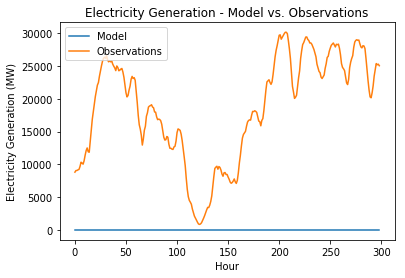

In [177]:
plt.plot(pred[np.arange(0,299)])
plt.plot(datatest.iloc[np.arange(0,299),0])
plt.title('Electricity Generation - Model vs. Observations')
plt.ylabel('Electricity Generation (MW)')
plt.xlabel('Hour')
plt.legend(['Model','Observations'], loc='upper left')
plt.show()

Plot the model's training history

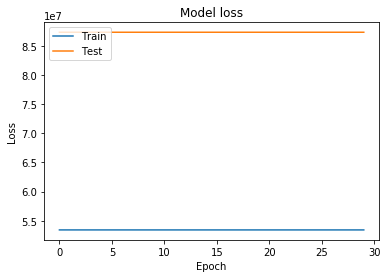

In [178]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Min max scale data (Xsc = (X - Xmin)/(Xmax - Xmin))

In [179]:
min_max_scaler = preprocessing.MinMaxScaler()

scaled_data = min_max_scaler.fit_transform(data.drop('date', axis=1, inplace=False))

scaled_datatrain = scaled_data[(data['date'] < "2015-01-01")]
scaled_datatest = scaled_data[(data['date'] > "2014-31-12")]

scaled_datatrain = pd.DataFrame(scaled_datatrain, columns=datatrain.columns, index=datatrain.index)
scaled_datatest = pd.DataFrame(scaled_datatest, columns=datatest.columns, index=datatest.index)

C:\Users\jbaumg\Anaconda3\envs\newenv\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Define, compile and train the model on scaled input data
Load the saved best model

In [199]:
model2 = Sequential()

model2.add(Dense(units=scaled_datatrain.shape[1], activation = 'sigmoid', input_dim = scaled_datatrain.shape[1]-1))
model2.add(Dense(units=20, activation='sigmoid'))
model2.add(Dense(units=20, activation='sigmoid'))
model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(
     loss = 'mean_squared_error',     
     optimizer = "adam",
     metrics = ['mean_squared_error']
 )

kc2=keras.callbacks.ModelCheckpoint("C:/Users/jbaumg/Desktop/model2.hdf", monitor='val_mean_squared_error', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history2 = model2.fit(
     scaled_datatrain.drop('generation', axis=1), 
     scaled_datatrain['generation'],
     epochs = 30, 
     batch_size = 128, 
     shuffle = True,
     validation_split = 0.3,
     callbacks=[kc2]
 )



Train on 6132 samples, validate on 2628 samples
Epoch 1/30
6132/6132 [==============================] - 5s 801us/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 2/30
6132/6132 [==============================] - 3s 410us/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 3/30
6132/6132 [==============================] - 1s 239us/step - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 4/30
6132/6132 [==============================] - 1s 224us/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 5/30
6132/6132 [==============================] - 1s 221us/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 6/30
6132/6132 [==============================] - 1s 237us/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_lo

Load best model and predict

In [ ]:
model2 = load_model('C:/Users/jbaumg/Desktop/model2.hdf')
pred2 = model2.predict(scaled_datatest.drop('generation', axis=1), batch_size=128)

Revert the scaling

In [200]:
min_max_scaler2 = preprocessing.MinMaxScaler()

scaled_w = min_max_scaler2.fit_transform(pd.DataFrame(data['generation']))

predsc = min_max_scaler2.inverse_transform(pred2)

C:\Users\jbaumg\Anaconda3\envs\newenv\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Calculate the correlation and the normalized root mean square error

In [201]:
np.corrcoef(datatest['generation'],predsc.flatten())

array([[1.       , 0.9415836],
       [0.9415836, 1.       ]])

In [197]:
np.sqrt(mean_squared_error(datatest['generation'], predsc.flatten()))/np.mean(datatest['generation'])

0.44401677081357305

Plot 300 modelled generation values against observed generation

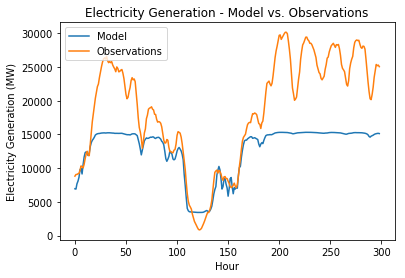

In [202]:
plt.plot(predsc[np.arange(0,299)])
plt.plot(datatest.iloc[np.arange(0,299),0])
plt.title('Electricity Generation - Model vs. Observations')
plt.ylabel('Electricity Generation (MW)')
plt.xlabel('Hour')
plt.legend(['Model','Observations'], loc='upper left')
plt.show()

Plot the model's training history

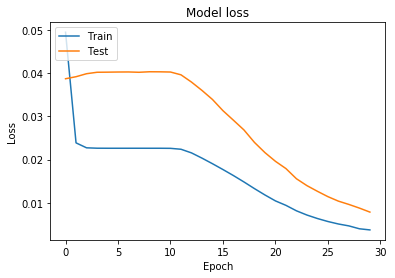

In [203]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Add random noise to input data

In [409]:
np.random.seed(11)
noise = np.random.normal(0, 0.1, [scaled_datatrain.shape[0],scaled_datatrain.shape[1]])
scaled_datatrain_noise = scaled_datatrain + noise
scaled_datatrain2 = scaled_datatrain.append(scaled_datatrain_noise)
scaled_datatrain2.reset_index(drop=True, inplace=True)

Revert the scaling and to dataframe

In [410]:
xx = min_max_scaler.inverse_transform(scaled_datatrain2)
xx = pd.DataFrame(xx, columns=scaled_datatrain2.columns, index=scaled_datatrain2.index)
data2 = xx.append(datatest)
data2.reset_index(drop=True, inplace=True)

In [412]:
scaled_datatrain2x = data2.iloc[0:17519,:]
scaled_datatest2x = data2.iloc[17520:26279,]

Scale whole dataframe and split into training and test set

In [413]:
min_max_scalerx = preprocessing.MinMaxScaler()

scaled_data2 = min_max_scalerx.fit_transform(data2)

scaled_datatrain2 = scaled_data2[0:17519,:]
scaled_datatest2 = scaled_data2[17520:26279,:]

In [414]:
scaled_datatrain2 = pd.DataFrame(scaled_datatrain2, columns=scaled_datatrain2x.columns, index=scaled_datatrain2x.index)
scaled_datatest2 = pd.DataFrame(scaled_datatest2, columns=scaled_datatest2x.columns, index=scaled_datatest2x.index)

Define, compile and train the model on input data with added noise
Load the saved best model

In [415]:
model3 = Sequential()

model3.add(Dense(units=scaled_datatrain2.shape[1], activation = 'sigmoid', input_dim = scaled_datatrain2.shape[1]-1))
model3.add(Dense(units=20, activation='sigmoid'))
model3.add(Dense(units=20, activation='sigmoid'))
model3.add(Dense(units=1, activation='sigmoid'))


model3.compile(
     loss = 'mean_squared_error',     
     optimizer = 'adam',
     metrics = ['mean_squared_error']
 )

kc3=keras.callbacks.ModelCheckpoint("C:/Users/jbaumg/Desktop/model3.hdf", monitor='val_mean_squared_error', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history3 = model3.fit(
     scaled_datatrain2.drop('generation', axis=1), 
     scaled_datatrain2['generation'],
     epochs = 30, 
     batch_size = 128, 
     shuffle = True,
     validation_split = 0.3,
     callbacks=[kc3]
 )



Train on 12263 samples, validate on 5256 samples
Epoch 1/30
12263/12263 [==============================] - 8s 684us/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 2/30
12263/12263 [==============================] - 4s 303us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 3/30
12263/12263 [==============================] - 4s 296us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 4/30
12263/12263 [==============================] - 4s 295us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 5/30
12263/12263 [==============================] - 4s 295us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6/30
12263/12263 [==============================] - 4s 290us/step - loss: 0.0041 - mean_squared_error: 0.

Load best model and predict

In [416]:
model3 = load_model('C:/Users/jbaumg/Desktop/model3.hdf')
pred3 = model3.predict(scaled_datatest2.drop('generation', axis=1), batch_size=128)

Revert the scaling

In [418]:
min_max_scalerx2 = preprocessing.MinMaxScaler()

min_max_scalerx2.fit_transform(pd.DataFrame(data2['generation']))
predsc2 = min_max_scalerx2.inverse_transform(pred3)

In [419]:
display(predsc2)

array([[7167.5176],
       [6945.4688],
       [7205.9307],
       ...,
       [4383.5254],
       [4407.594 ],
       [3994.7478]], dtype=float32)

Calculate the correlation and the normalized root mean square error

In [420]:
np.corrcoef(datatest['generation'],predsc2.flatten())

array([[1.        , 0.97898011],
       [0.97898011, 1.        ]])

In [421]:
np.sqrt(mean_squared_error(datatest['generation'], predsc2.flatten()))/np.mean(datatest['generation'])

0.28015816589733983

Plot 300 modelled generation values against observed generation

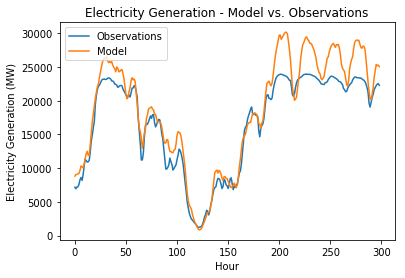

In [422]:
plt.plot(predsc2[np.arange(0,299)])
plt.plot(datatest['generation'].loc[np.arange(0,299)])
plt.title('Electricity Generation - Model vs. Observations')
plt.ylabel('Electricity Generation (MW)')
plt.xlabel('Hour')
plt.legend(['Observations', 'Model'], loc='upper left')
plt.show()

Plot the model's training history

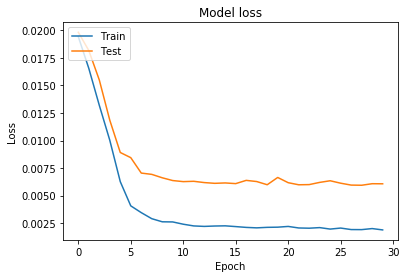

In [423]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(Derive predominant wind directions from input data via 270 - atan2(eastward wind, northward wind) * (180/pi))
Load datasets with pre-calculated wind directions and split into training and test dataset

In [255]:
datadir = pd.read_csv('C:/Users/jbaumg/Desktop/datadir.csv')
datadir = datadir.drop('Unnamed: 0',axis=1)

datadirtrain = datadir[(data['date'] < "2015-01-01")]

datadirtest = datadir[(data['date'] > "2014-31-12")]

datadirtrain.drop('date', axis=1, inplace=True)
datadirtest.drop('date', axis=1, inplace=True)

datadirtrain.reset_index(drop=True, inplace=True)
datadirtest.reset_index(drop=True, inplace=True)



C:\Users\jbaumg\Anaconda3\envs\newenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Scale the data

In [261]:
min_max_scaler3 = preprocessing.MinMaxScaler()

scaled_datadir = min_max_scaler3.fit_transform(datadir.drop('date', axis=1, inplace=False))

scaled_datadirtrain = scaled_datadir[(data['date'] < "2015-01-01")]
scaled_datadirtest = scaled_datadir[(data['date'] > "2014-31-12")]

scaled_datadirtrain = pd.DataFrame(scaled_datadirtrain, columns=datadirtrain.columns, index=datadirtrain.index)
scaled_datadirtest = pd.DataFrame(scaled_datadirtest, columns=datadirtest.columns, index=datadirtest.index)


C:\Users\jbaumg\Anaconda3\envs\newenv\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [263]:
display(scaled_datadirtrain)

,generation,cap,X0,X1,X2,X3,X4,X5,X6,X7,...,X1241.1,X1242.1,X1243.1,X1244.1,X1245.1,X1246.1,X1247.1,X1248.1,X1249.1,X1250.1
0,0.247984,0.000000,0.138152,0.191640,0.189677,0.097402,0.055064,0.086327,0.125395,0.084472,...,0.467279,0.472624,0.483309,0.488841,0.459456,0.461382,0.478643,0.459479,0.464091,0.467702
1,0.269973,0.000000,0.127942,0.126673,0.142416,0.123921,0.169651,0.057547,0.174700,0.061431,...,0.462891,0.462406,0.466440,0.470040,0.458816,0.463684,0.466660,0.459591,0.463360,0.462427
2,0.275094,0.000000,0.100985,0.062190,0.073287,0.184092,0.208963,0.041674,0.251423,0.028672,...,0.455011,0.458804,0.470200,0.478030,0.449611,0.451232,0.469507,0.450012,0.451905,0.455550
3,0.260987,0.000000,0.056212,0.099314,0.109379,0.212971,0.236680,0.063317,0.261931,0.094762,...,0.477788,0.482575,0.497285,0.504530,0.468200,0.471435,0.499464,0.466291,0.476713,0.484839
4,0.256387,0.000000,0.093729,0.142814,0.110837,0.195245,0.262812,0.042380,0.311877,0.073683,...,0.531592,0.540055,0.535630,0.534422,0.507360,0.517401,0.534303,0.509081,0.526768,0.533273
5,0.246787,0.000000,0.103693,0.124959,0.109082,0.100637,0.107980,0.024033,0.161520,0.032895,...,0.565805,0.564812,0.558837,0.558726,0.590158,0.572695,0.558553,0.592260,0.565420,0.563774
6,0.252461,0.000000,0.083436,0.092355,0.181312,0.127289,0.104190,0.036131,0.153257,0.057850,...,0.569202,0.543085,0.531885,0.536110,0.590536,0.584803,0.534594,0.588140,0.568316,0.548235
7,0.257000,0.000000,0.124148,0.035194,0.224293,0.103320,0.073350,0.051891,0.119943,0.099221,...,0.562395,0.528027,0.521168,0.526727,0.594886,0.584709,0.520925,0.591874,0.553959,0.517233
8,0.247922,0.000000,0.110179,0.036604,0.154223,0.130400,0.086907,0.032198,0.123825,0.113931,...,0.547307,0.541517,0.534043,0.533559,0.594128,0.579453,0.535883,0.593349,0.564411,0.541899
9,0.215015,0.000000,0.100615,0.096312,0.108116,0.126074,0.117476,0.034788,0.142081,0.061012,...,0.530639,0.519802,0.536494,0.551336,0.557693,0.547223,0.547335,0.564799,0.536528,0.527414


Define, compile and train the model on input data with added wind directions


In [274]:
model4 = Sequential()

model4.add(Dense(units=scaled_datadirtrain.shape[1], activation = 'sigmoid', input_dim = scaled_datadirtrain.shape[1]-1))
model4.add(Dense(units=20, activation='sigmoid'))
model4.add(Dense(units=20, activation='sigmoid'))
model4.add(Dense(units=1, activation='sigmoid'))

model4.compile(
     loss = 'mean_squared_error',
     optimizer = 'adam',
     metrics = ['mean_squared_error']
 )

kc4=keras.callbacks.ModelCheckpoint("C:/Users/jbaumg/Desktop/model4.hdf", monitor='val_mean_squared_error', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history4 = model4.fit(
     scaled_datadirtrain.drop('generation', axis=1), 
     scaled_datadirtrain['generation'],
     epochs = 30, 
     batch_size = 128, 
     shuffle = True,
     validation_split = 0.3,
     callbacks=[kc4]
 )


Train on 6132 samples, validate on 2628 samples
Epoch 1/60
6132/6132 [==============================] - 9s 1ms/step - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 2/60
6132/6132 [==============================] - 6s 908us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 3/60
6132/6132 [==============================] - 5s 789us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 4/60
6132/6132 [==============================] - 5s 842us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5/60
6132/6132 [==============================] - 5s 875us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 6/60
6132/6132 [==============================] - 5s 781us/step - loss: 8.5336e-04 - mean_squared_error: 8.5336e-04 - 

Epoch 48/60
6132/6132 [==============================] - 5s 771us/step - loss: 3.9907e-04 - mean_squared_error: 3.9907e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 49/60
6132/6132 [==============================] - 5s 794us/step - loss: 5.0443e-04 - mean_squared_error: 5.0443e-04 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 50/60
6132/6132 [==============================] - 5s 791us/step - loss: 3.9357e-04 - mean_squared_error: 3.9357e-04 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 51/60
6132/6132 [==============================] - 5s 781us/step - loss: 4.0403e-04 - mean_squared_error: 4.0403e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 52/60
6132/6132 [==============================] - 5s 794us/step - loss: 3.0551e-04 - mean_squared_error: 3.0551e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 53/60
6132/6132 [==============================] - 5s 883us/step - loss: 3.4494e-04 - mean_squared_error: 3.4494e-04 - 

Load best model and predict

In [ ]:
model4 = load_model('C:/Users/jbaumg/Desktop/model4.hdf')
pred4 = model4.predict(scaled_datadirtest.drop('generation', axis=1), batch_size=128)

Revert the scaling

In [275]:
predsc3 = min_max_scaler2.inverse_transform(pred4)

Calculate the correlation and the normalized root mean square error

In [276]:
np.corrcoef(datatest['generation'],predsc3.flatten())

array([[1.        , 0.97681023],
       [0.97681023, 1.        ]])

In [277]:
np.sqrt(mean_squared_error(datatest['generation'], predsc3.flatten()))/np.mean(datatest['generation'])

0.31381032815549575

Plot 300 modelled generation values against observed generation

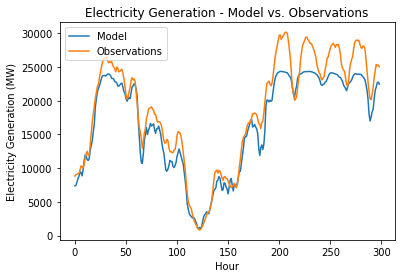

In [278]:
plt.plot(predsc3[np.arange(0,299)])
plt.plot(datatest['generation'].loc[np.arange(0,299)])
plt.title('Electricity Generation - Model vs. Observations')
plt.ylabel('Electricity Generation (MW)')
plt.xlabel('Hour')
plt.legend(['Model','Observations'], loc='upper left')
plt.show()

Plot the model's training history

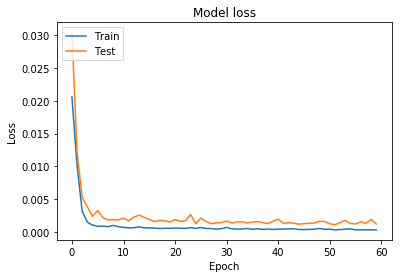

In [279]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Play around with Network Architecture
Define, compile and train the model on input data with added wind directions
Load the saved best model

In [458]:
model5 = Sequential()

model5.add(Dense(units=scaled_datatrain2.shape[1], activation = 'sigmoid', input_dim = scaled_datatrain2.shape[1]-1))
model5.add(Dense(units=60, activation='sigmoid'))
model5.add(Dense(units=1, activation='sigmoid'))

model5.compile(
     loss = 'mean_squared_error',
     optimizer = 'adam',
     metrics = ['mean_squared_error']
 )

kc5=keras.callbacks.ModelCheckpoint("C:/Users/jbaumg/Desktop/model5.hdf", monitor='val_mean_squared_error', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history5 = model5.fit(
     scaled_datatrain2.drop('generation', axis=1), 
     scaled_datatrain2['generation'],
     epochs = 30, 
     batch_size = 128, 
     shuffle = True,
     validation_split = 0.3,
     callbacks=[kc5]
 )


Train on 12263 samples, validate on 5256 samples
Epoch 1/30
12263/12263 [==============================] - 10s 788us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 2/30
12263/12263 [==============================] - 4s 298us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 3/30
12263/12263 [==============================] - 4s 295us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 4/30
12263/12263 [==============================] - 4s 313us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 5/30
12263/12263 [==============================] - 4s 295us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 6/30
12263/12263 [==============================] - 4s 298us/step - loss: 0.0021 - mean_squared_error: 0

Load best model and predict

In [459]:
model5 = load_model('C:/Users/jbaumg/Desktop/model5.hdf')
pred5 = model5.predict(scaled_datatest2.drop('generation', axis=1), batch_size=128)

Revert scaling

In [460]:
predsc4 = min_max_scalerx2.inverse_transform(pred5)

Calculate the correlation and the normalized root mean square error

In [461]:
np.corrcoef(datatest['generation'],predsc4.flatten())

array([[1.        , 0.98089868],
       [0.98089868, 1.        ]])

In [462]:
np.sqrt(mean_squared_error(datatest['generation'], predsc4.flatten()))/np.mean(datatest['generation'])

0.2787202166269288

Plot 300 modelled generation values against observed generation

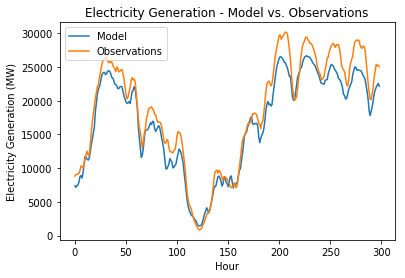

In [463]:
plt.plot(predsc4[np.arange(0,299)])
plt.plot(datatest['generation'].loc[np.arange(0,299)])
plt.title('Electricity Generation - Model vs. Observations')
plt.ylabel('Electricity Generation (MW)')
plt.xlabel('Hour')
plt.legend(['Model','Observations'], loc='upper left')
plt.show()

Plot the model's training history

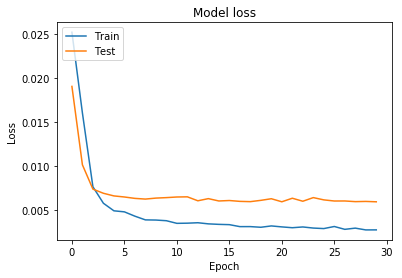

In [452]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

__Experiment with Activation Functions and Batch Sizes__
Define, compile and train the model on input data with added wind directions
Load the saved best model

In [441]:
model6 = Sequential()

model6.add(Dense(units=scaled_datatrain2.shape[1], activation = 'sigmoid', input_dim = scaled_datatrain2.shape[1]-1))
model6.add(Dense(units=60, activation='sigmoid'))
model6.add(Dropout(0.2))
model6.add(Dense(units=60, activation='sigmoid'))
model6.add(Dropout(0.2))
model6.add(Dense(units=60, activation='sigmoid'))
model6.add(Dropout(0.2))
model6.add(Dense(units=1, activation='linear'))

model6.compile(
     loss = 'mean_squared_error',
     optimizer = 'adam',
     metrics = ['mean_squared_error']
 )

kc6=keras.callbacks.ModelCheckpoint("C:/Users/jbaumg/Desktop/model6.hdf", monitor='val_mean_squared_error', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history6 = model6.fit(
     scaled_datatrain2.drop('generation', axis=1), 
     scaled_datatrain2['generation'],
     epochs = 30, 
     batch_size = 128, 
     shuffle = True,
     validation_split = 0.3,
     callbacks=[kc6]
 )


Train on 12263 samples, validate on 5256 samples
Epoch 1/30
12263/12263 [==============================] - 10s 776us/step - loss: 0.0974 - mean_squared_error: 0.0974 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 2/30
12263/12263 [==============================] - 4s 315us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 3/30
12263/12263 [==============================] - 4s 313us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 4/30
12263/12263 [==============================] - 4s 318us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 5/30
12263/12263 [==============================] - 4s 312us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 6/30
12263/12263 [==============================] - 4s 315us/step - loss: 0.0086 - mean_squared_error: 0

Load best model and predict

In [442]:
model6 = load_model('C:/Users/jbaumg/Desktop/model6.hdf')
pred6 = model6.predict(scaled_datatest2.drop('generation', axis=1), batch_size=128)

Revert the scaling

In [443]:
predsc5 = min_max_scalerx2.inverse_transform(pred6)

Calculate the correlation and the normalized root mean square error

In [444]:
np.corrcoef(datatest['generation'],predsc5.flatten())

array([[1.        , 0.95717324],
       [0.95717324, 1.        ]])

In [445]:
np.sqrt(mean_squared_error(datatest['generation'], predsc5.flatten()))/np.mean(datatest['generation'])

0.700395781164244

Plot 300 modelled generation values against observed generation

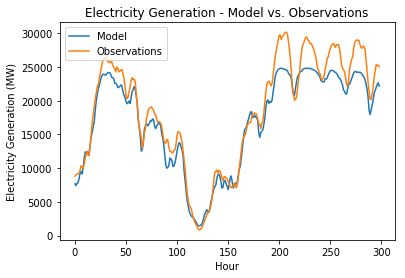

In [325]:
plt.plot(predsc5[np.arange(0,299)])
plt.plot(datatest['generation'].loc[np.arange(0,299)])
plt.title('Electricity Generation - Model vs. Observations')
plt.ylabel('Electricity Generation (MW)')
plt.xlabel('Hour')
plt.legend(['Model','Observations'], loc='upper left')
plt.show()

Plot the model's training history

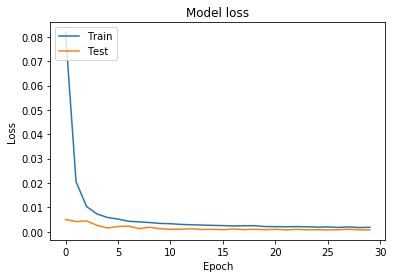

In [326]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Automated Hyperparameter Optimization - Code Example ##


In [ ]:
def data():
    """
    Data providing function:

    This function is separated from create_model() so that hyperopt
    won't reload data for each evaluation run.
    """
    x_train=scaled_datatrain.drop('generation', axis=1)
    y_train=scaled_datatrain['generation']
    x_test=scaled_datatest.drop('generation', axis=1)
    y_test=scaled_datatest['generation']
    
    return x_train, y_train, x_test, y_test

def create_model(x_train, y_train, x_test, y_test):
    model = Sequential()

    model.add(Dense(units=x_train.shape[1], activation = {{choice(['relu', 'sigmoid'])}}, input_dim = x_train.shape[1]))
    model.add(Dense(units=20, activation={{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense(units=20, activation={{choice(['relu', 'sigmoid'])}}))
    model.add(Dense(units=1, activation={{choice(['relu', 'sigmoid'])}}))	

    model.compile(
            loss = 'mean_squared_error',
            optimizer={{choice(['rmsprop', 'adam', 'sgd'])}},
            metrics = ['mean_squared_error']
            )

    result = model.fit(x_train=x_train, 
                       y_train=y_train,
              batch_size={{choice([64, 128])}},
              epochs=30,
              verbose=2,
              validation_split=0.2)
    #get the highest model quality of the training epochs
    validation_rmse = np.amin(result.history['val_mean_squared_error']) 
    print('Best mean_squared_error of epoch:', validation_rmse)
    return {'loss': -validation_rmse, 'status': STATUS_OK, 'model': model}

best_run = optim.minimize(model=create_model,
                          data=data,
                          algo=tpe.suggest,
                          max_evals=10,
                          trials=Trials(),
                         notebook_name='Untitled4')